# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import Weatherapi_key
print(Weatherapi_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ("output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

45c74c0b04f92a80917796963d5ff7a8


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API
from api_keys import Weatherapi_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + Weatherapi_key
print(Weatherapi_key)

45c74c0b04f92a80917796963d5ff7a8


In [5]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        #print(response)
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
                
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Tapikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=tapikan
Processing Record 2 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=kavieng
Processing Record 3 | Povenets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=povenets
Processing Record 4 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=kapaa
Processing Record 5 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=rikitea
Processing Record 6 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=busselton
Processing Record 7 | Paamiut
http://api.openweathermap.org/data/2.

Processing Record 56 | Kinsale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=kinsale
Processing Record 57 | Zabol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=zabol
Processing Record 58 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=puerto ayora
City not found. Skipping...
Processing Record 59 | Miles City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=miles city
Processing Record 60 | Tomohon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=tomohon
Processing Record 61 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=saint-philippe
Processing Record 62 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 112 | Moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=moron
Processing Record 113 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=hithadhoo
Processing Record 114 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=rawson
Processing Record 115 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=bonthe
Processing Record 116 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=lompoc
Processing Record 117 | Asifabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=asifabad
Processing Record 118 | Ewa Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=ewa beach

Processing Record 168 | Praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=praya
City not found. Skipping...
Processing Record 169 | Dabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=dabat
Processing Record 170 | Atagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=atagay
Processing Record 171 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=flinders
Processing Record 172 | Kayerkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=kayerkan
Processing Record 173 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=saint george
Processing Record 174 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b0

City not found. Skipping...
Processing Record 224 | Sal Rei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=sal rei
Processing Record 225 | Jiangyou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=jiangyou
Processing Record 226 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=cherskiy
Processing Record 227 | Sao Jose da Coroa Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=sao jose da coroa grande
Processing Record 228 | Mwanza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=mwanza
Processing Record 229 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=tiksi
City not found. Skipping...
Processing Record 230 | Muli
http://api.openweathermap

Processing Record 280 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=carnarvon
Processing Record 281 | Jau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=jau
Processing Record 282 | Elizabeth City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=elizabeth city
Processing Record 283 | Great Falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=great falls
Processing Record 284 | Sao Miguel do Araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=sao miguel do araguaia
Processing Record 285 | Zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=zhanaozen
Processing Record 286 | Kathmandu
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 336 | Aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=aksu
City not found. Skipping...
Processing Record 337 | Awbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=awbari
Processing Record 338 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=vestmannaeyjar
Processing Record 339 | Mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=mandalgovi
Processing Record 340 | Lander
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=lander
Processing Record 341 | Cap-aux-Meules
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=cap-aux-meules
Processing Record 342 | Norden
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 391 | Bemidji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=bemidji
Processing Record 392 | Mahaplag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=mahaplag
City not found. Skipping...
Processing Record 393 | Klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=klyuchi
Processing Record 394 | Pringsewu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=pringsewu
Processing Record 395 | Yatou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=yatou
Processing Record 396 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=ixtapa
Processing Record 397 | Hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a809

Processing Record 446 | Aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=aksarka
Processing Record 447 | Pasni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=pasni
Processing Record 448 | Alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=alugan
City not found. Skipping...
Processing Record 449 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=clyde river
Processing Record 450 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=meulaboh
Processing Record 451 | Mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=mahon
City not found. Skipping...
Processing Record 452 | Susehri
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 501 | Teya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=teya
Processing Record 502 | Mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=mareeba
City not found. Skipping...
Processing Record 503 | Olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=olinda
Processing Record 504 | Rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=rongcheng
Processing Record 505 | Hauterive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=hauterive
City not found. Skipping...
Processing Record 506 | Luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=luau
Processing Record 507 | Moussoro
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 556 | Camabatela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=camabatela
Processing Record 557 | Lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=lima
Processing Record 558 | Waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=waddan
Processing Record 559 | Mingyue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=mingyue
City not found. Skipping...
Processing Record 560 | Progreso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=progreso
Processing Record 561 | Timra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=45c74c0b04f92a80917796963d5ff7a8&q=timra
City not found. Skipping...
Processing Record 562 | Hengshui
http://api.openweathermap.org/data/2.5/weather?units=Impe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [7]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tapikan,100,PH,1564262224,91,10.61,122.17,76.73,3.18
1,Kavieng,100,PG,1564262227,79,-2.57,150.80,81.77,11.72
2,Povenets,0,RU,1564262228,84,62.85,34.83,55.67,2.06
3,Kapaa,20,US,1564262217,66,22.08,-159.32,84.20,14.99
4,Rikitea,12,PF,1564262230,81,-23.12,-134.97,74.03,9.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

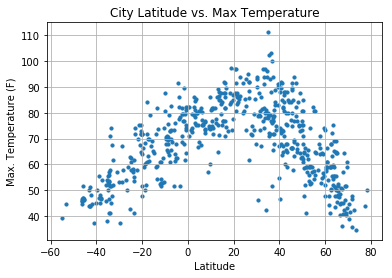

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude vs Max_Temperature.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

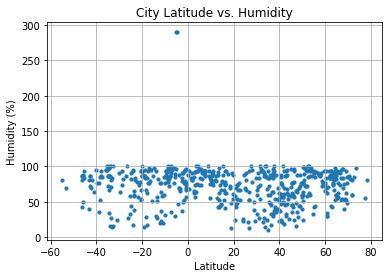

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Lalitude vs. Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

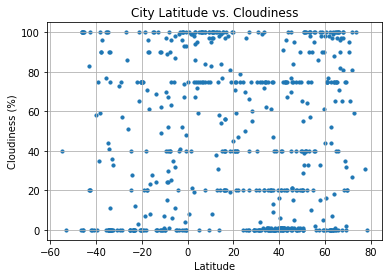

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("city_latitude vs cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

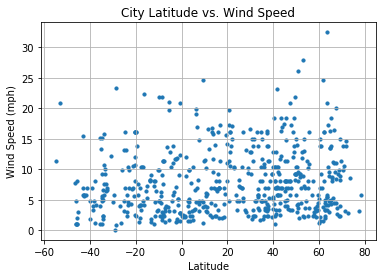

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_Latitude vs Wind_Speed.png")
# Show plot
plt.show()

In [12]:
#three description
#1) As we know, that temperature increases as we approach the equator, however temperature peaks at around 20 degrees latitude, not exactly at the equatorial line.

#2) Cloudiness and humidity do not show a strong correlation to latitude.

#3) in city latitude vs wind speed indicate that wind speed slightly increase as we move away from the equator.